# №1

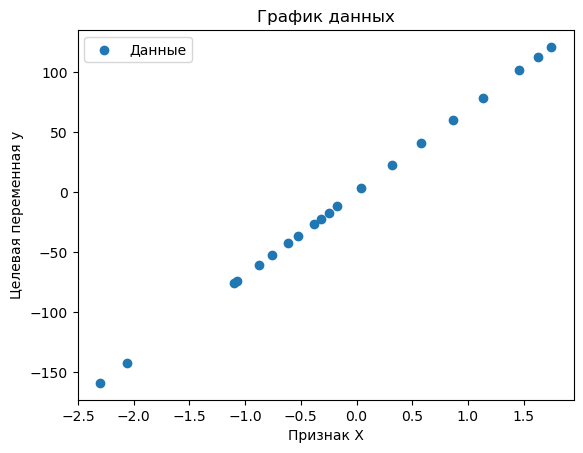

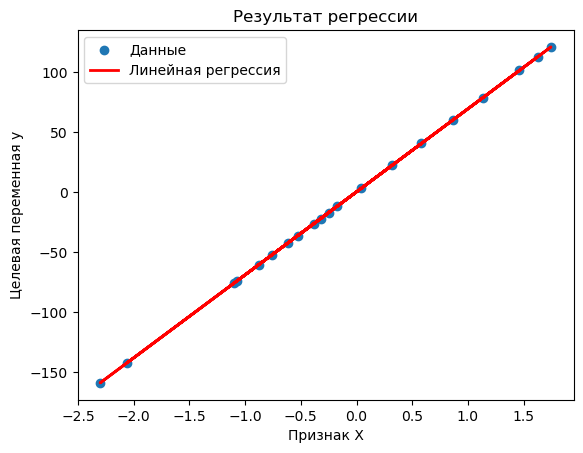

Среднеквадратичная ошибка: 4.7686641720610166e-29


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных из файлов CSV
x_data = pd.read_csv('x.csv')
y_data = pd.read_csv('y.csv')

# Извлечение значений признаков и целевой переменной
X = x_data.iloc[:, 1].values.reshape(-1, 1)
y = y_data.iloc[:, 1].values

# Визуализация данных
plt.scatter(X, y, label='Данные')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.title('График данных')
plt.legend()
plt.show()

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на данных
model.fit(X, y)

# Получение предсказаний модели
y_pred = model.predict(X)

# Визуализация результата регрессии
plt.scatter(X, y, label='Данные')
plt.plot(X, y_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.title('Результат регрессии')
plt.legend()
plt.show()

# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y, y_pred)
print(f'Среднеквадратичная ошибка: {mse}')

# №2

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

# Получение коэффициента детерминации R^2 с использованием метода score
r2 = model.score(X, y)

print(f'Коэффициент детерминации R^2 с использованием метода score: {r2}')

# Расчет коэффициента детерминации R^2 вручную
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2_manual = 1 - mse / np.var(y)

print(f'Коэффициент детерминации R^2 вручную: {r2_manual}')


Коэффициент детерминации R^2 с использованием метода score: 1.0
Коэффициент детерминации R^2 вручную: 1.0


# №3

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

class MyLinearRegression:
    def __init__(self):
        self.model = LinearRegression()
        self.scaler = MinMaxScaler()  # Инициализация объекта для нормализации

    def fit(self, X, y):
        # Нормализация признаков
        X_normalized = self.scaler.fit_transform(X)
        
        # Обучение модели на нормализованных данных
        self.model.fit(X_normalized, y)

    def predict(self, X):
        # Нормализация входных данных
        X_normalized = self.scaler.transform(X)
        
        # Получение предсказаний на нормализованных данных
        y_pred_normalized = self.model.predict(X_normalized)
        
        # Обратное масштабирование предсказанных значений
        y_pred = self.scaler.inverse_transform(y_pred_normalized)
        
        return y_pred

    def score(self, X, y):
        # Нормализация входных данных
        X_normalized = self.scaler.transform(X)
        
        # Вычисление R^2 на нормализованных данных
        return self.model.score(X_normalized, y)


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# Генерируем искусственные данные
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель с нормализацией
model = MyLinearRegression()
model.fit(X_train, y_train)

# Предсказываем значения для тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
score = model.score(X_test, y_test)

print(f'R^2 (коэффициент детерминации) модели: {score:.2f}')


R^2 (коэффициент детерминации) модели: 0.96
